In [4]:
import backtrader as bt
import quantstats

In [5]:
from strategies.strategynorth import StrategyNorth
from loader import load_stock_data
from stocks import Stock

In [6]:
cerebro = bt.Cerebro()

In [7]:
strategy_class = StrategyNorth

Add a strategy

In [8]:
cerebro.addstrategy(strategy_class)

0

In [9]:
cerebro.addanalyzer(bt.analyzers.PyFolio, _name='PyFolio')

start, end = '2014-06-18', None       #从开始到现在<br>
start, end = '2015-05-01', None       #2015股灾到现在<br>
start, end = '2015-05-01', '2019-01-01'       #2015股灾到2019爆发前夕<br>
start, end = '2014-06-18', '2019-01-01'       #从开始到2019爆发前夕<br>
start, end = '2019-01-01', '2020-12-31'       #此轮牛市<br>
start, end = '2020-07-01', '2021-03-31'<br>
start, end = '2018-01-01', '2021-08-13'<br>
start, end = '2017-12-01', None<br>
start, end = '2015-12-01', None

In [10]:
start, end = '2020-12-01', None
# start, end = '2021-02-10', None
# start, end = '2018-01-22', '2020-06-30'   #HS300EFT 一次下探恢复
# start, end = '2016-07-22', '2020-07-07'   #CYB50EFT 一次下探恢复
# start, end = '2016-07-22', '2018-10-16' #CYB50ETF 最高到最低
# start, end = '2018-10-16', None   #CYB50ETF 最低点到现在
# start, end = None, None   #CYB50EFT 开始到现在

In [11]:
stocks = [Stock.HS300, Stock.CYB50]
# stocks = [Stock.HS300ETF, Stock.CYB50ETF]
# stocks = [Stock.HS300ETF]
# stocks = [Stock.CYB50ETF]
# stocks = [Stock.HS300, Stock.KC50]

In [12]:
load_stock_data(cerebro, stocks, start, end)

In [13]:
cerebro.broker.setcash(1000000.0)
cerebro.addsizer(bt.sizers.PercentSizerInt, percents=95)
cerebro.broker.setcommission(commission=0.00002)

In [14]:
print('Starting Portfolio Value: %.3f' % cerebro.broker.getvalue())
results = cerebro.run()
print('Final Portfolio Value: %.3f' % cerebro.broker.getvalue())

Starting Portfolio Value: 1000000.000
2020-12-01, BUY CREATE HS300, 5067.098
2020-12-02, BUY EXECUTED, Price: 5072.976, Size: 187, Cost: 948646.512, Comm 18.973
2021-01-26, SELL CREATE HS300, 5512.968
2021-01-27, SELL EXECUTED, Price: 5505.771, Size: -187, Cost: 948646.512, Comm 20.592
2021-01-27, OPERATION PROFIT, HS300, GROSS 80932.665, NET 80893.100, DAYS 56
2021-02-01, BUY CREATE HS300, 5417.648
2021-02-02, BUY EXECUTED, Price: 5429.703, Size: 189, Cost: 1026213.867, Comm 20.524
2021-02-10, SELL CREATE HS300, 5807.719
2021-02-18, SELL EXECUTED, Price: 5922.071, Size: -189, Cost: 1026213.867, Comm 22.385
2021-02-18, OPERATION PROFIT, HS300, GROSS 93057.552, NET 93014.642, DAYS 16
2021-02-18, BUY CREATE HS300, 5768.381
2021-02-19, BUY EXECUTED, Price: 5734.019, Size: 193, Cost: 1106665.667, Comm 22.133
2021-02-26, SELL CREATE HS300, 5336.761
2021-03-01, SELL EXECUTED, Price: 5389.250, Size: -193, Cost: 1106665.667, Comm 20.803
2021-03-01, OPERATION PROFIT, HS300, GROSS -66540.417, NE

In [15]:
portfolio_stats = results[0].analyzers.getbyname('PyFolio')
returns, positions, transactions, gross_lev = portfolio_stats.get_pf_items()
returns.index = returns.index.tz_convert(None)

In [16]:
quantstats.reports.html(
    returns,
    output='../report/%s_%s-%s_%s.html' % (strategy_class.__name__, start, end, "-".join(map(lambda s: s.stockname, stocks))),
    title=strategy_class.__name__)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


<IPython.core.display.Javascript object>

[[<Figure size 432x288 with 6 Axes>]]

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


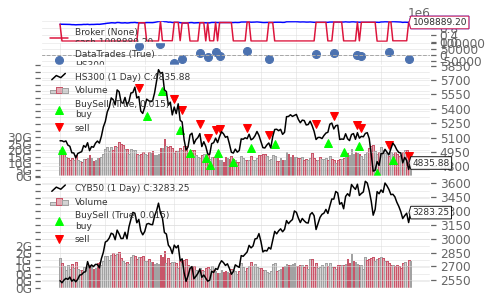

In [17]:
cerebro.plot()